In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [34]:
with open('../data/communities.names', 'rb') as read_file:
    data = read_file.readlines()

In [35]:
headers = [attr.decode('UTF-8').strip() for attr in data[75:203]]
headers = ['_'.join(attr.split(' ')[1:]) for attr in headers]
df = pd.read_csv('../data/communities.data', header=None)
df.columns = headers

In [36]:
df.head()

,state_numeric,county_numeric,community_numeric,communityname_string,fold_numeric,population_numeric,householdsize_numeric,racepctblack_numeric,racePctWhite_numeric,racePctAsian_numeric,racePctHisp_numeric,agePct12t21_numeric,agePct12t29_numeric,agePct16t24_numeric,agePct65up_numeric,numbUrban_numeric,pctUrban_numeric,medIncome_numeric,pctWWage_numeric,pctWFarmSelf_numeric,pctWInvInc_numeric,pctWSocSec_numeric,pctWPubAsst_numeric,pctWRetire_numeric,medFamInc_numeric,perCapInc_numeric,whitePerCap_numeric,blackPerCap_numeric,indianPerCap_numeric,AsianPerCap_numeric,OtherPerCap_numeric,HispPerCap_numeric,NumUnderPov_numeric,PctPopUnderPov_numeric,PctLess9thGrade_numeric,PctNotHSGrad_numeric,PctBSorMore_numeric,PctUnemployed_numeric,PctEmploy_numeric,PctEmplManu_numeric,PctEmplProfServ_numeric,PctOccupManu_numeric,PctOccupMgmtProf_numeric,MalePctDivorce_numeric,MalePctNevMarr_numeric,FemalePctDiv_numeric,TotalPctDiv_numeric,PersPerFam_numeric,PctFam2Par_numeric,PctKids2Par_numeric,PctYoungKids2Par_numeric,PctTeen2Par_numeric,PctWorkMomYoungKids_numeric,PctWorkMom_numeric,NumIlleg_numeric,PctIlleg_numeric,NumImmig_numeric,PctImmigRecent_numeric,PctImmigRec5_numeric,PctImmigRec8_numeric,PctImmigRec10_numeric,PctRecentImmig_numeric,PctRecImmig5_numeric,PctRecImmig8_numeric,PctRecImmig10_numeric,PctSpeakEnglOnly_numeric,PctNotSpeakEnglWell_numeric,PctLargHouseFam_numeric,PctLargHouseOccup_numeric,PersPerOccupHous_numeric,PersPerOwnOccHous_numeric,PersPerRentOccHous_numeric,PctPersOwnOccup_numeric,PctPersDenseHous_numeric,PctHousLess3BR_numeric,MedNumBR_numeric,HousVacant_numeric,PctHousOccup_numeric,PctHousOwnOcc_numeric,PctVacantBoarded_numeric,PctVacMore6Mos_numeric,MedYrHousBuilt_numeric,PctHousNoPhone_numeric,PctWOFullPlumb_numeric,OwnOccLowQuart_numeric,OwnOccMedVal_numeric,OwnOccHiQuart_numeric,RentLowQ_numeric,RentMedian_numeric,RentHighQ_numeric,MedRent_numeric,MedRentPctHousInc_numeric,MedOwnCostPctInc_numeric,MedOwnCostPctIncNoMtg_numeric,NumInShelters_numeric,NumStreet_numeric,PctForeignBorn_numeric,PctBornSameState_numeric,PctSameHouse85_numeric,PctSameCity85_numeric,PctSameState85_numeric,LemasSwornFT_numeric,LemasSwFTPerPop_numeric,LemasSwFTFieldOps_numeric,LemasSwFTFieldPerPop_numeric,LemasTotalReq_numeric,LemasTotReqPerPop_numeric,PolicReqPerOffic_numeric,PolicPerPop_numeric,RacialMatchCommPol_numeric,PctPolicWhite_numeric,PctPolicBlack_numeric,PctPolicHisp_numeric,PctPolicAsian_numeric,PctPolicMinor_numeric,OfficAssgnDrugUnits_numeric,NumKindsDrugsSeiz_numeric,PolicAveOTWorked_numeric,LandArea_numeric,PopDens_numeric,PctUsePubTrans_numeric,PolicCars_numeric,PolicOperBudg_numeric,LemasPctPolicOnPatr_numeric,LemasGangUnitDeploy_numeric,LemasPctOfficDrugUn_numeric,PolicBudgPerPop_numeric,ViolentCrimesPerPop_numeric
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00

# Task 1

 Create a histogram of the ViolentCrimesPerPop_numeric

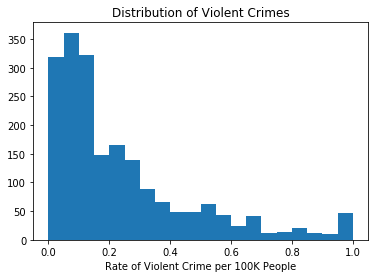

In [76]:
#__SOLUTION__
fig, ax = plt.subplots()
ax.hist(df['ViolentCrimesPerPop_numeric'], bins=20)
ax.set_title('Distribution of Violent Crimes')
ax.set_xlabel('Rate of Violent Crime per 100K People');

Create a figure with two plots, one above the other.  

The top is the histogram from above, and the bottom is a boxplot of the same data.

In [ ]:
# Your code here

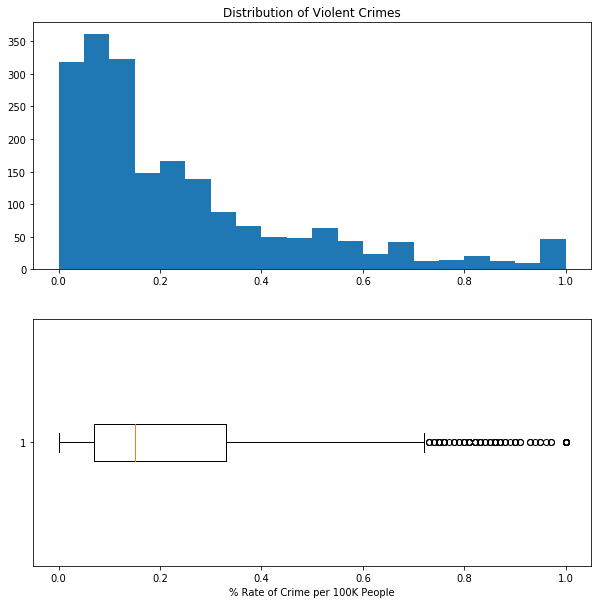

In [75]:
#__SOLUTION__
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].hist(df['ViolentCrimesPerPop_numeric'], bins=20)
ax[0].set_title('Distribution of Violent Crimes')
ax[1].boxplot(df['ViolentCrimesPerPop_numeric'], vert=False)
ax[1].set_xlabel('% Rate of Crime per 100K People');

Next, let's compare the distributions of violent crime across communities with high and low unemployment.

To do so, we will split the data up into two: communities with pct unemployment above the median value, and those below.

In pandas, we do so by subsetting the data frame.  `df[df['column'] > some_value]`

In [ ]:
# your code here
df_high_unmply = None
df_low_unmply = None

In [68]:
#__SOLUTION__
df_high_unmply = df[df['PctUnemployed_numeric'] > df['PctUnemployed_numeric'].median()]
df_low_unmply = df[df['PctUnemployed_numeric'] < df['PctUnemployed_numeric'].median()]

Now, plot two histograms on the same axis, one on top of the other.  Set the opacity (alpha) of the second histogram to .5

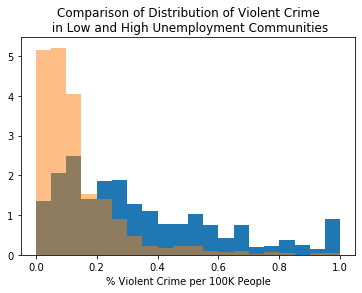

In [74]:
fix, ax = plt.subplots()

ax.hist(df_high_unmply['ViolentCrimesPerPop_numeric'], density=True, label='High Unemployment', bins=20)
ax.hist(df_low_unmply['ViolentCrimesPerPop_numeric'], alpha=.5, density=True, label='Low Unemployment', bins=20)
ax.set_title('Comparison of Distribution of Violent Crime\n in Low and High Unemployment Communities')
ax.set_xlabel('% Rate of Violent Crime per 100K People');